In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [40]:
X = pd.read_csv(r"X.csv")
egg = pd.read_csv(r"y.csv")

In [41]:
# Join X and y on their indices
X['egg_price'] = egg

# Add a new column 'Y' which is the 'egg_price' column shifted down by 1 entry
X['Y'] = X['egg_price'].shift(-1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Y', 'Year-Month']), X['Y'], test_size=0.25, shuffle = False)

In [43]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train.head()

,const,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,egg_hols,Thanksgiving,Passover/Easter,gas price,egg_price
0,1.0,8,7.097,0.802,15.885375,390.50,6.500600,False,False,False,3.611,2.005
1,1.0,56,7.203,0.825,16.733152,486.30,7.465652,False,False,False,4.322,2.046
2,1.0,68,7.422,0.849,16.798190,495.28,7.859310,False,False,True,4.213,2.520
3,1.0,56,7.364,0.875,16.583690,522.29,7.838690,False,False,False,4.545,2.863
4,1.0,14,7.403,0.891,16.876064,459.59,7.597964,False,False,False,5.032,2.707


In [45]:
X_test

,const,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,egg_hols,Thanksgiving,Passover/Easter,gas price,egg_price
24,1.0,8,6.637,0.971,11.648636,272.30,4.344432,False,False,True,3.733,2.864
25,1.0,10,6.818,0.964,12.184348,289.42,4.555543,False,False,False,3.725,2.699
26,1.0,8,6.827,0.993,11.724500,265.55,4.395250,False,False,False,3.576,2.715
27,1.0,3,6.883,1.017,11.180000,260.26,3.990978,False,False,False,3.600,3.080
28,1.0,4,6.955,1.009,10.128571,269.69,4.005595,False,False,False,3.338,3.821
29,1.0,20,6.869,0.998,10.032174,272.85,4.160978,False,False,False,3.261,3.370
30,1.0,93,6.843,0.956,9.953810,253.75,4.238333,False,True,False,3.175,3.649
31,1.0,294,6.915,0.949,9.833182,252.17,4.405909,True,False,False,3.139,4.146
32,1.0,36,7.044,0.973,10.284783,254.09,4.749891,False,False,False,3.196,4.953


In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [47]:
y_test

24    2.699
25    2.715
26    3.080
27    3.821
28    3.370
29    3.649
30    4.146
31    4.953
32      NaN
Name: Y, dtype: float64

Root Mean Squared Error: 0.3363658364675214
R-squared: 0.7782321765827889


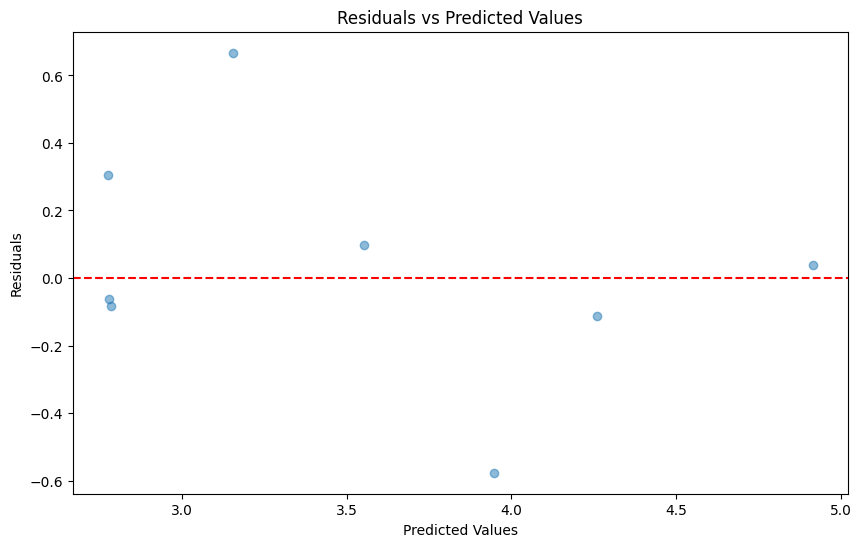

In [48]:
# Calculate the mean squared error and R-squared value  
mse = mean_squared_error(y_test.iloc[:-1], pred[:-1])
r2 = r2_score(y_test.iloc[:-1], pred[:-1])
print(f'Root Mean Squared Error: {sqrt(mse)}')
print(f'R-squared: {r2}')

# Calculate the residuals
residuals = y_test.iloc[:-1] - pred[:-1]

# Create a DataFrame for the residuals  
residuals_df = pd.DataFrame({'Actual': y_test.iloc[:-1], 'Predicted': pred[:-1], 'Residuals': residuals})


# Plot the residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pred[:-1], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for interpretation
cv_mse_scores = -cv_scores
print(f'Cross-Validation MSE Scores: {cv_mse_scores}')
print(f'Average Cross-Validation MSE: {cv_mse_scores.mean()}')

Cross-Validation MSE Scores: [0.07387377 0.18110839 0.2888217  0.16524555 0.55804967]
Average Cross-Validation MSE: 0.2534198145660871


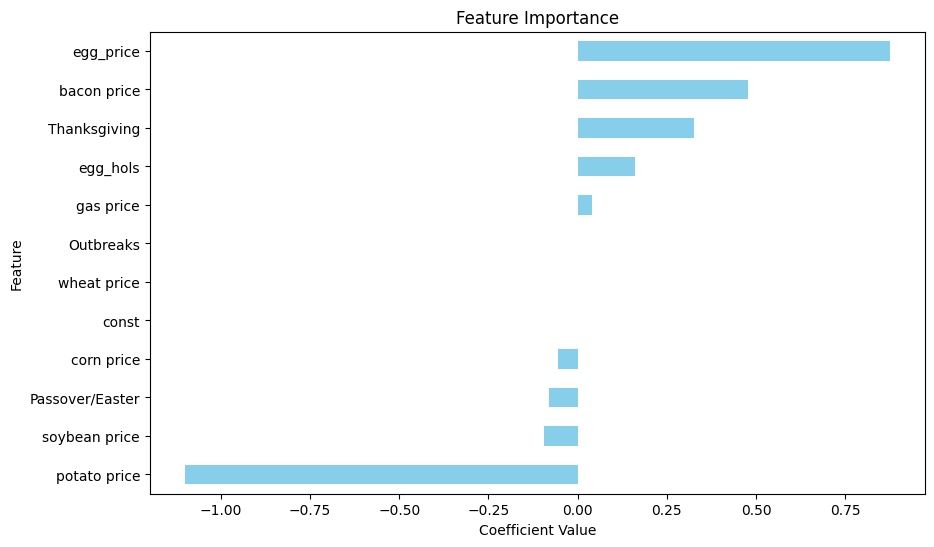

In [50]:
# Extract feature importance from the linear regression model
feature_importance = pd.Series(lr.coef_, index=X_train.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

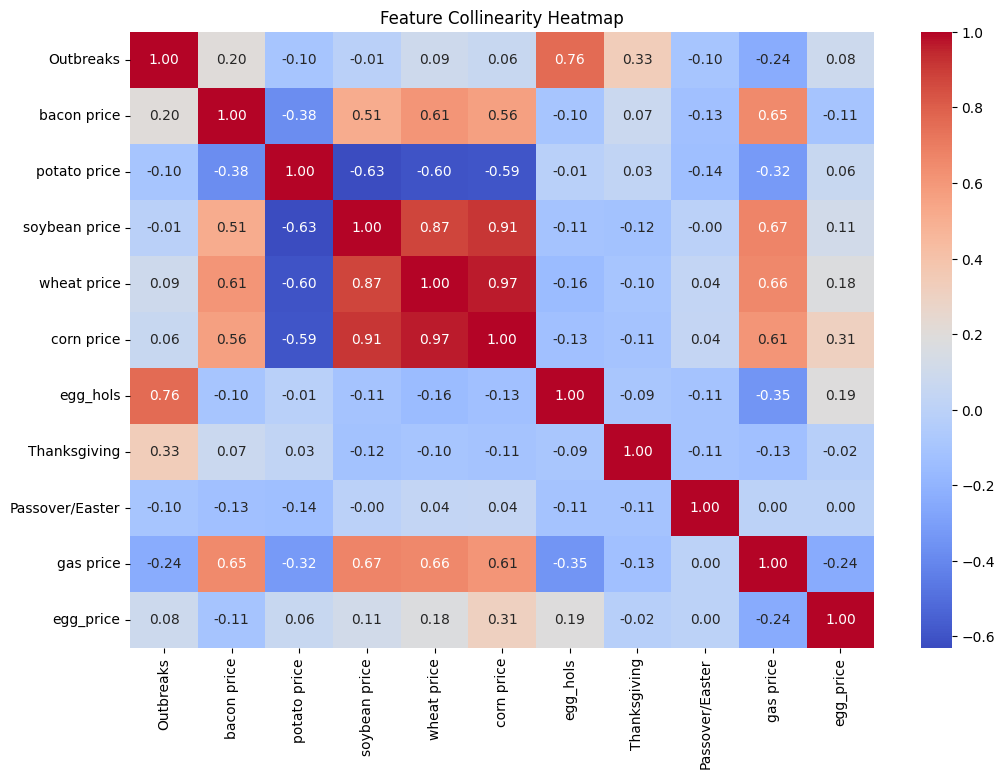

In [51]:
# Compute the correlation matrix
correlation_matrix = X_train.drop(columns=['const']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Collinearity Heatmap")
plt.show()

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train.drop(columns=['const']), y_train)

# Predict the y values for the test set
rf_pred = rf.predict(X_test.drop(columns=['const']))

# Evaluate the model
rf_rmse = sqrt(mean_squared_error(y_test.iloc[:-1], rf_pred[:-1]))
rf_r2 = r2_score(y_test.iloc[:-1], rf_pred[:-1])

print(f'Random Forest Root Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')

Random Forest Root Mean Squared Error: 0.20337765461250057
Random Forest R-squared: 0.6013626293919854


In [53]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for interpretation
cv_mse_scores = -cv_scores
print(f'Cross-Validation MSE Scores: {cv_mse_scores}')
print(f'Average Cross-Validation MSE: {cv_mse_scores.mean()}')

Cross-Validation MSE Scores: [0.07387377 0.18110839 0.2888217  0.16524555 0.55804967]
Average Cross-Validation MSE: 0.2534198145660871


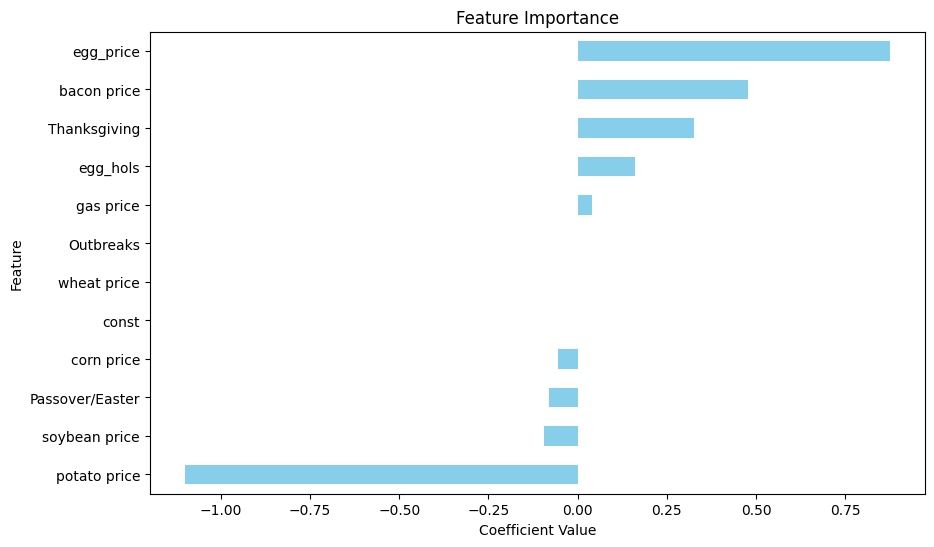

In [54]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [55]:
# Select the top 3 features based on feature importance
top_3_features = feature_importance.abs().sort_values(ascending=False).iloc[1:4].index  # Exclude 'const'

# Prepare the training and testing data with the top 3 features
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

# Train the linear regression model
lr_top3 = LinearRegression()
lr_top3.fit(X_train_top3, y_train)

# Predict on the test set
pred_top3 = lr_top3.predict(X_test_top3)

# Evaluate the model
mse_top3 = mean_squared_error(y_test.iloc[:-1], pred_top3[:-1])
r2_top3 = r2_score(y_test.iloc[:-1], pred_top3[:-1])

print(f'Root Mean Squared Error (Top 3 Features): {sqrt(mse_top3)}')
print(f'R-squared (Top 3 Features): {r2_top3}')

Root Mean Squared Error (Top 3 Features): 0.5209122025193778
R-squared (Top 3 Features): 0.4681320302156291


## LR & RF Model with Top 3 Features

In [56]:
# Select the top 3 features based on feature importance
top_3_features = feature_importance.abs().sort_values(ascending=False).iloc[1:4].index  # Exclude 'const'

# Prepare the training and testing data with the top 3 features
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

# Train the linear regression model
lr_top3 = LinearRegression()
lr_top3.fit(X_train_top3, y_train)

# Predict on the test set
pred_top3 = lr_top3.predict(X_test_top3)

# Evaluate the model
mse_top3 = mean_squared_error(y_test.iloc[:-1], pred_top3[:-1])
r2_top3 = r2_score(y_test.iloc[:-1], pred_top3[:-1])

print('Linear Regression Model with Top 3 Features')
print(f'Root Mean Squared Error (Top 3 Features): {sqrt(mse_top3)}')
print(f'R-squared (Top 3 Features): {r2_top3}')

Linear Regression Model with Top 3 Features
Root Mean Squared Error (Top 3 Features): 0.5209122025193778
R-squared (Top 3 Features): 0.4681320302156291


In [57]:
print(f'Top 3 Features used in the model: {list(top_3_features)}')

Top 3 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving']


In [58]:
# Train the Random Forest model with the top 3 features
rf_top3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top3.fit(X_train_top3, y_train)

# Predict on the test set
rf_pred_top3 = rf_top3.predict(X_test_top3)

# Evaluate the model
rf_r2_top3 = r2_score(y_test.iloc[:-1], rf_pred_top3[:-1])
rf_rmse_top3 = sqrt(mean_squared_error(y_test.iloc[:-1], rf_pred_top3[:-1]))

# Display the results
print(f'Random Forest R-squared (Top 3 Features): {rf_r2_top3}')
print(f'Random Forest RMSE (Top 3 Features): {rf_rmse_top3}')
print(f'Top 3 Features used in the model: {list(top_3_features)}')

Random Forest R-squared (Top 3 Features): 0.4856211947847655
Random Forest RMSE (Top 3 Features): 0.5122761597639507
Top 3 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving']


In [59]:
# Select the top 4 features based on feature importance
top_4_features = feature_importance.abs().sort_values(ascending=False).iloc[1:5].index  # Exclude 'const'

# Prepare the training and testing data with the top 3 features
X_train_top4 = X_train[top_4_features]
X_test_top4 = X_test[top_4_features]

# Train the linear regression model
lr_top4 = LinearRegression()
lr_top4.fit(X_train_top4, y_train)

# Predict on the test set
pred_top4 = lr_top4.predict(X_test_top4)

# Evaluate the model
mse_top4 = mean_squared_error(y_test.iloc[:-1], pred_top4[:-1])
r2_top4 = r2_score(y_test.iloc[:-1], pred_top4[:-1])

print('Linear Regression Model with Top 4 Features')
print(f'Root Mean Squared Error (Top 4 Features): {sqrt(mse_top4)}')
print(f'R-squared (Top 4 Features): {r2_top4}')

Linear Regression Model with Top 4 Features
Root Mean Squared Error (Top 4 Features): 0.4581062402492603
R-squared (Top 4 Features): 0.5886540835146021


In [60]:
print(f'Top 4 Features used in the model: {list(top_4_features)}')

Top 4 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving', 'egg_hols']


In [61]:
# Train the Random Forest model with the top 4 features
rf_top4 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top4.fit(X_train_top4, y_train)

# Predict on the test set
rf_pred_top4 = rf_top4.predict(X_test_top4)

# Evaluate the model
rf_r2_top4 = r2_score(y_test.iloc[:-1], rf_pred_top4[:-1])
rf_rmse_top4 = sqrt(mean_squared_error(y_test.iloc[:-1], rf_pred_top4[:-1]))

# Display the results
print(f'Random Forest R-squared (Top 4 Features): {rf_r2_top4}')
print(f'Random Forest RMSE (Top 4 Features): {rf_rmse_top4}')
print(f'Top 4 Features used in the model: {list(top_4_features)}')

Random Forest R-squared (Top 4 Features): 0.54678063006607
Random Forest RMSE (Top 4 Features): 0.4808579979188253
Top 4 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving', 'egg_hols']


In [62]:
# Select the top 5 features based on feature importance
top_5_features = feature_importance.abs().sort_values(ascending=False).iloc[1:6].index  # Exclude 'const'

# Prepare the training and testing data with the top 5 features
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

# Train the linear regression model
lr_top5 = LinearRegression()
lr_top5.fit(X_train_top5, y_train)

# Predict on the test set
pred_top5 = lr_top5.predict(X_test_top5)

# Evaluate the model
mse_top5 = mean_squared_error(y_test.iloc[:-1], pred_top5[:-1])
r2_top5 = r2_score(y_test.iloc[:-1], pred_top5[:-1])

print('Linear Regression Model with Top 5 Features')
print(f'Root Mean Squared Error (Top 5 Features): {sqrt(mse_top5)}')
print(f'R-squared (Top 5 Features): {r2_top5}')

Linear Regression Model with Top 5 Features
Root Mean Squared Error (Top 5 Features): 0.3639863538261781
R-squared (Top 5 Features): 0.74031612763925


In [63]:
print(f'Top 5 Features used in the model: {list(top_5_features)}')

Top 5 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving', 'egg_hols', 'soybean price']


In [64]:
# Train the Random Forest model with the top 5 features
rf_top5 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top5.fit(X_train_top4, y_train)

# Predict on the test set
rf_pred_top5 = rf_top5.predict(X_test_top4)

# Evaluate the model
rf_r2_top5 = r2_score(y_test.iloc[:-1], rf_pred_top5[:-1])
rf_rmse_top5 = sqrt(mean_squared_error(y_test.iloc[:-1], rf_pred_top5[:-1]))

# Display the results
print(f'Random Forest R-squared (Top 5 Features): {rf_r2_top5}')
print(f'Random Forest RMSE (Top 5 Features): {rf_rmse_top5}')
print(f'Top 5 Features used in the model: {list(top_5_features)}')

Random Forest R-squared (Top 5 Features): 0.54678063006607
Random Forest RMSE (Top 5 Features): 0.4808579979188253
Top 5 Features used in the model: ['egg_price', 'bacon price', 'Thanksgiving', 'egg_hols', 'soybean price']
